In [4]:
import pandas as pd
import numpy as np
import statistics as stats
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

from scipy.stats import zscore
from math import sin, cos, sqrt, atan2




from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestRegressor


from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
#import pydotplus as pydot
from sklearn import tree
from os import system

In [5]:
df=pd.read_csv("TaxiFare.csv")
df.sample(15)

unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
28635   03:07.0     6.1  2011-09-11 00:03:07 UTC           -73.986451   
45975   33:00.0     6.1  2009-09-01 06:33:00 UTC           -74.000030   
30480   11:38.0    15.5  2013-07-25 15:11:38 UTC           -73.975394   
45663   35:13.0     6.1  2010-03-31 12:35:13 UTC           -73.982388   
45228   38:00.0     7.3  2010-01-07 18:38:00 UTC           -73.967708   
6624    21:17.0     4.9  2009-08-31 13:21:17 UTC           -73.971502   
6136    11:45.0    49.8  2012-03-16 09:11:45 UTC           -73.783508   
40884   13:00.0     3.7  2012-02-22 07:13:00 UTC           -73.980632   
8971    50:34.0     7.7  2011-10-22 20:50:34 UTC           -73.998600   
15507   39:00.0    16.0  2013-08-25 01:39:00 UTC           -73.989205   
47875   22:49.0     8.1  2009-05-14 19:22:49 UTC           -73.966262   
33145   06:00.0     9.0  2014-04-10 07:06:00 UTC           -74.000132   
25354   34:00.0    13.3  2010-12-07 14:34:00 UTC           -73.996002   
1875    10:09.0     6.5  2011-10-17 20:10:09 UTC           -73.981018   
22543   22:51.0     6.9  2010-09-28 08:22:51 UTC           -73.986391   

       latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
28635           40.755351            -73.981386            40.743669   
45975           40.761407            -73.978813            40.750403   
30480           40.733217            -73.984625            40.751421   
45663           40.771309            -73.970212            40.761413   
45228           40.787575            -73.954432            40.774030   
6624            40.762115            -73.963852            40.773953   
6136            40.648675            -73.952804            40.781656   
40884           40.742357            -73.974087            40.751080   
8971            40.761000            -73.977900            40.777200   
15507           40.721127            -73.948492            40.780822   
47875           40.765042            -73.945468            40.784708   
33145           40.742835            -73.974845            40.757572   
25354           40.738503            -73.977362            40.784400   
1875            40.759194            -73.961722            40.772023   
22543           40.753227            -73.985220            40.760549   

       no_of_passenger  
28635                2  
45975                1  
30480                2  
45663                1  
45228                1  
6624                 1  
6136                 1  
40884                1  
8971                 0  
15507                5  
47875                4  
33145                1  
25354                5  
1875                 1  
22543                1

In [6]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [7]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [8]:
df=df.drop(columns=['unique_id'],axis=1)

In [9]:
import pandas as pd
from math import radians, sin, cos, sqrt, atan2

def calculate_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    radius = 6371
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = radius * c
    return distance
df['displacement'] = df.apply(lambda row: calculate_distance(row['latitude_of_pickup'], row['longitude_of_pickup'], row['latitude_of_dropoff'], row['longitude_of_dropoff']), axis=1)


dist=[]
for i in range(len(df.latitude_of_pickup)):
    lat1=df.latitude_of_pickup[i]
    lat2=df.latitude_of_dropoff[i]
    lon1=df.longitude_of_pickup[i]
    lon2=df.longitude_of_dropoff[i]
    coords_1=(lat1,lon1)
    coords_2=(lat2,lon2)
    distance=float(geopy.distance.geodesic(coords_1, coords_2).km)
    dist.append(distance)
df['displacement']=dist

In [10]:
df.date_time_of_pickup=df.date_time_of_pickup.str.replace("UTC","")

In [11]:
df['year']=pd.to_datetime(df.date_time_of_pickup).dt.year
df['month']=pd.to_datetime(df.date_time_of_pickup).dt.month_name()
df['day']=pd.to_datetime(df.date_time_of_pickup).dt.day
df['weekday']=pd.to_datetime(df.date_time_of_pickup).dt.day_name()
df['time']=pd.to_datetime(df.date_time_of_pickup).dt.time
df=df.drop(columns=['date_time_of_pickup'],axis=1)
a=df.copy()
df.sample(20)

amount  longitude_of_pickup  latitude_of_pickup  longitude_of_dropoff  \
9957     6.00           -73.959781           40.779551            -73.944282   
28214    5.30           -73.968250           40.767136            -73.964402   
23815    4.50           -73.959232           40.774427            -73.952173   
22444    6.00           -73.981560           40.778433            -73.969552   
48278   19.30           -73.961708           40.763562            -74.015145   
11331    5.50           -73.984881           40.754990            -73.977461   
5337    17.50           -74.005142           40.706710            -74.006647   
7499    56.80           -73.776717           40.645305            -73.982352   
45084   14.10           -73.977765           40.745827            -73.975520   
27632   49.15           -73.952311           40.786495            -73.789613   
44157   24.90           -73.968050           40.792083            -74.001080   
12505    6.10           -73.946038           40.773142            -73.960645   
35778   32.00           -73.980017           40.784057            -73.849042   
19802   14.00           -73.981478           40.746838            -73.983949   
48653   17.00           -73.958510           40.717148            -74.001079   
16965   14.90           -73.992910           40.731578            -73.951435   
7868     8.50           -74.006968           40.743910            -73.992952   
31955   45.00           -73.786114           40.642013            -73.976580   
35945    6.90           -73.986751           40.746263            -73.980493   
43381    6.90           -73.993154           40.735935            -74.008140   

       latitude_of_dropoff  no_of_passenger  displacement  year      month  \
9957             40.776359                2      1.352451  2012    October   
28214            40.758001                1      1.066213  2012      April   
23815            40.781382                0      0.975385  2012   February   
22444            40.788578                1      1.514825  2013       July   
48278            40.710978                1      7.379605  2009   February   
11331            40.764206                1      1.200301  2014    October   
5337             40.751412                1      4.972253  2013  September   
7499             40.748455                1     20.786806  2013   February   
45084            40.788042                1      4.697900  2012        May   
27632            40.647050                1     20.698895  2009      March   
44157            40.716677                5      8.834296  2009    October   
12505            40.779135                1      1.398895  2012      March   
35778            40.723502                1     12.924852  2013       July   
19802            40.722259                1      2.740979  2013     August   
48653            40.741438                1      4.490177  2013      March   
16965            40.782630                1      6.665496  2009   February   
7868             40.730858                1      1.871051  2009  September   
31955            40.756082                2     20.462078  2009     August   
35945            40.728909                4      2.000413  2011  September   
43381            40.730740                1      1.388558  2012       July   

       day    weekday      time  
9957     8     Monday  15:25:44  
28214    9     Monday  18:36:33  
23815    6     Monday  15:31:54  
22444    3  Wednesday  14:11:31  
48278   23     Monday  08:35:00  
11331    7    Tuesday  18:49:05  
5337    12   Thursday  09:42:06  
7499    18     Monday  10:25:00  
45084   21     Monday  14:19:00  
27632   22     Sunday  15:30:40  
44157   15   Thursday  08:52:00  
12505   15   Thursday  16:22:00  
35778   25   Thursday  22:46:00  
19802   29   Thursday  10:58:58  
48653   21   Thursday  01:33:20  
16965   20     Friday  21:31:00  
7868    11     Friday  17:44:15  
31955   23     Sunday  13:07:36  
35945   29   Thursday  19:57:40  
43381  

In [12]:
a=a.drop(columns=['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff'],axis=1)
b=a.copy()

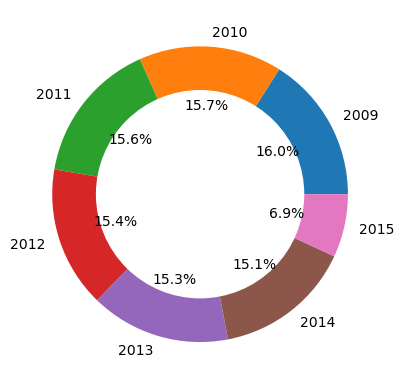

In [13]:
label = a['year'].unique()
plt.pie(a['year'].value_counts(), labels = label,autopct='%1.1f%%')
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [14]:
label = a['month'].unique()
color_palette = sns.color_palette('husl')
plt.pie(a['month'].value_counts(), labels = label,autopct='%1.1f%%',colors=color_palette)
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

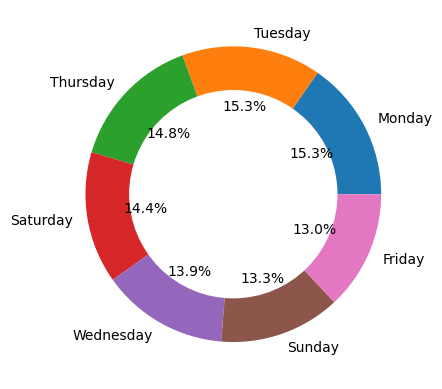

In [15]:
label = a['weekday'].unique()
plt.pie(a['weekday'].value_counts(), labels = label,autopct='%1.1f%%')
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [16]:
ax,fig=plt.subplots(figsize=(10,10))
sns.barplot(x=df.weekday,y=df.amount)
plt.show()

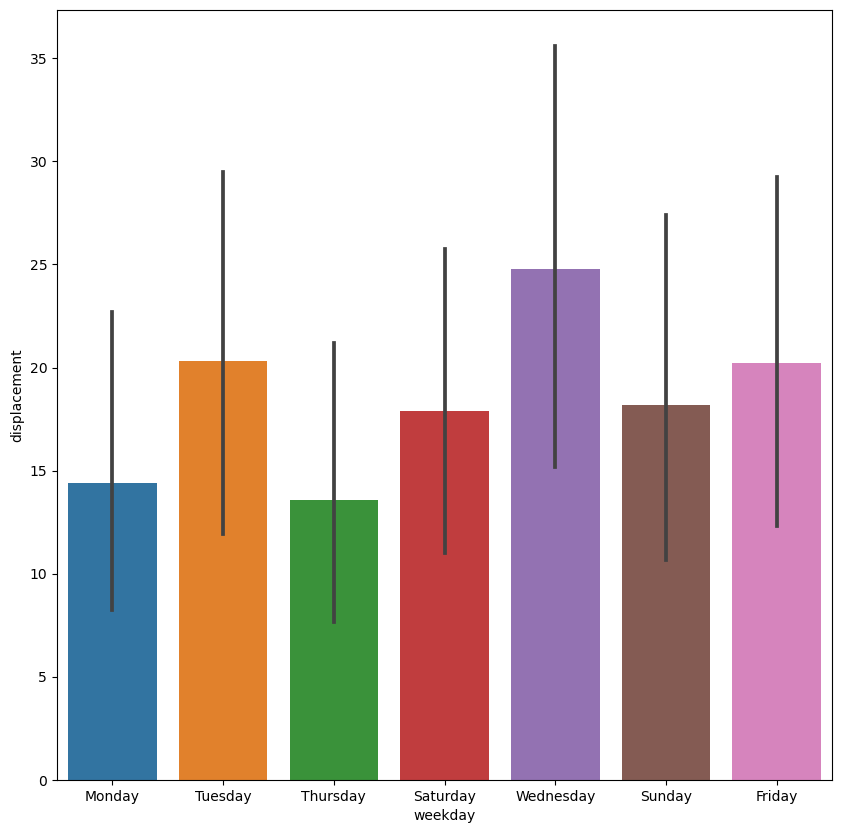

In [17]:
ax,fig=plt.subplots(figsize=(10,10))
colors = sns.color_palette('husl')
sns.barplot(x=df.weekday,y=df.displacement)
plt.show()

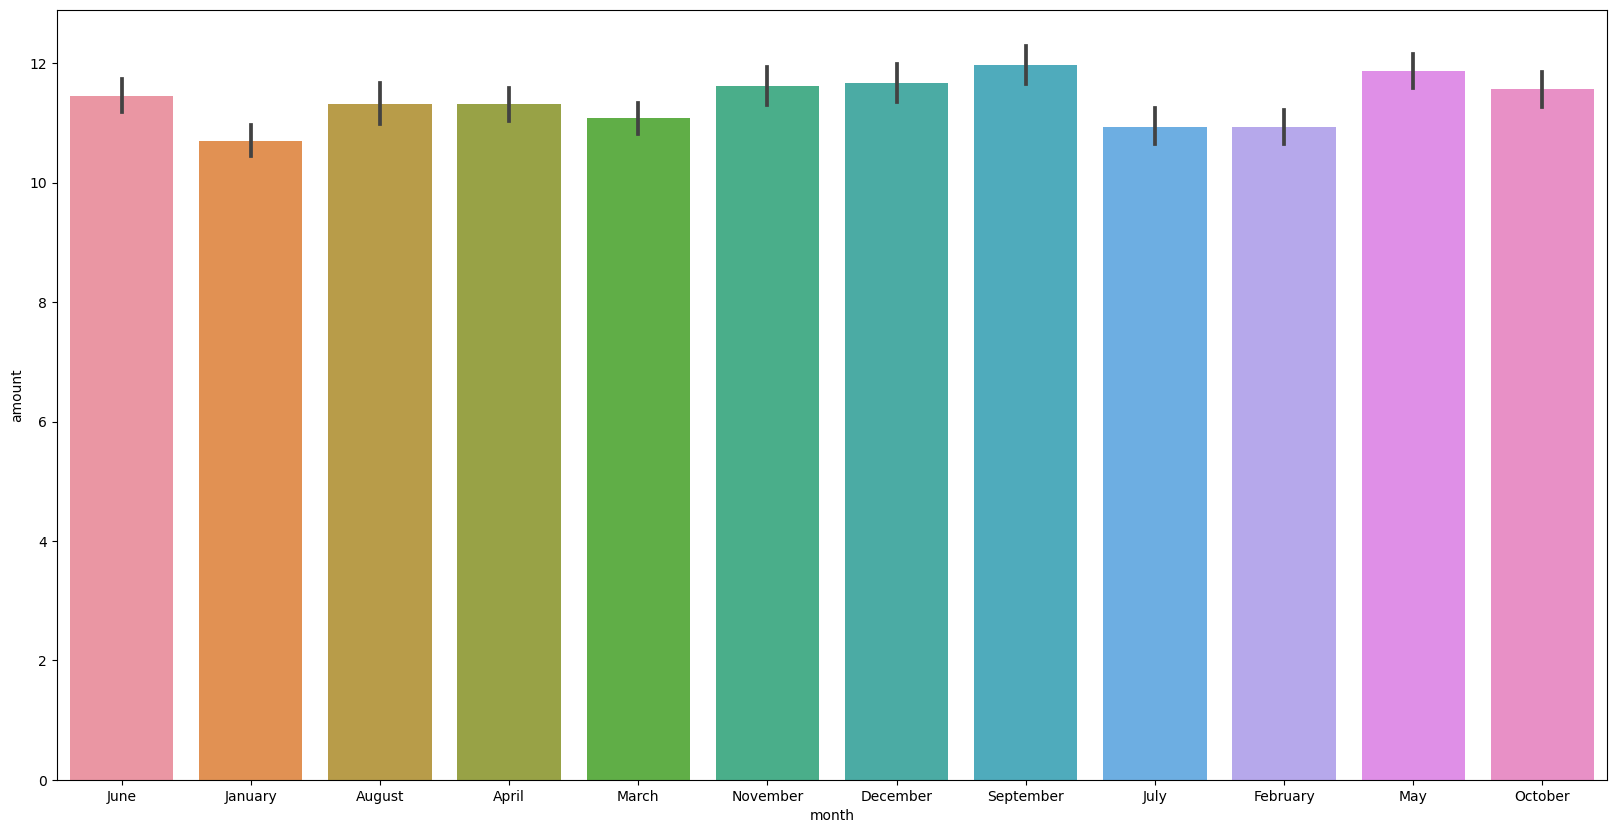

In [18]:
ax,fig=plt.subplots(figsize=(20,10))
sns.barplot(x=df.month,y=df.amount)
plt.show()

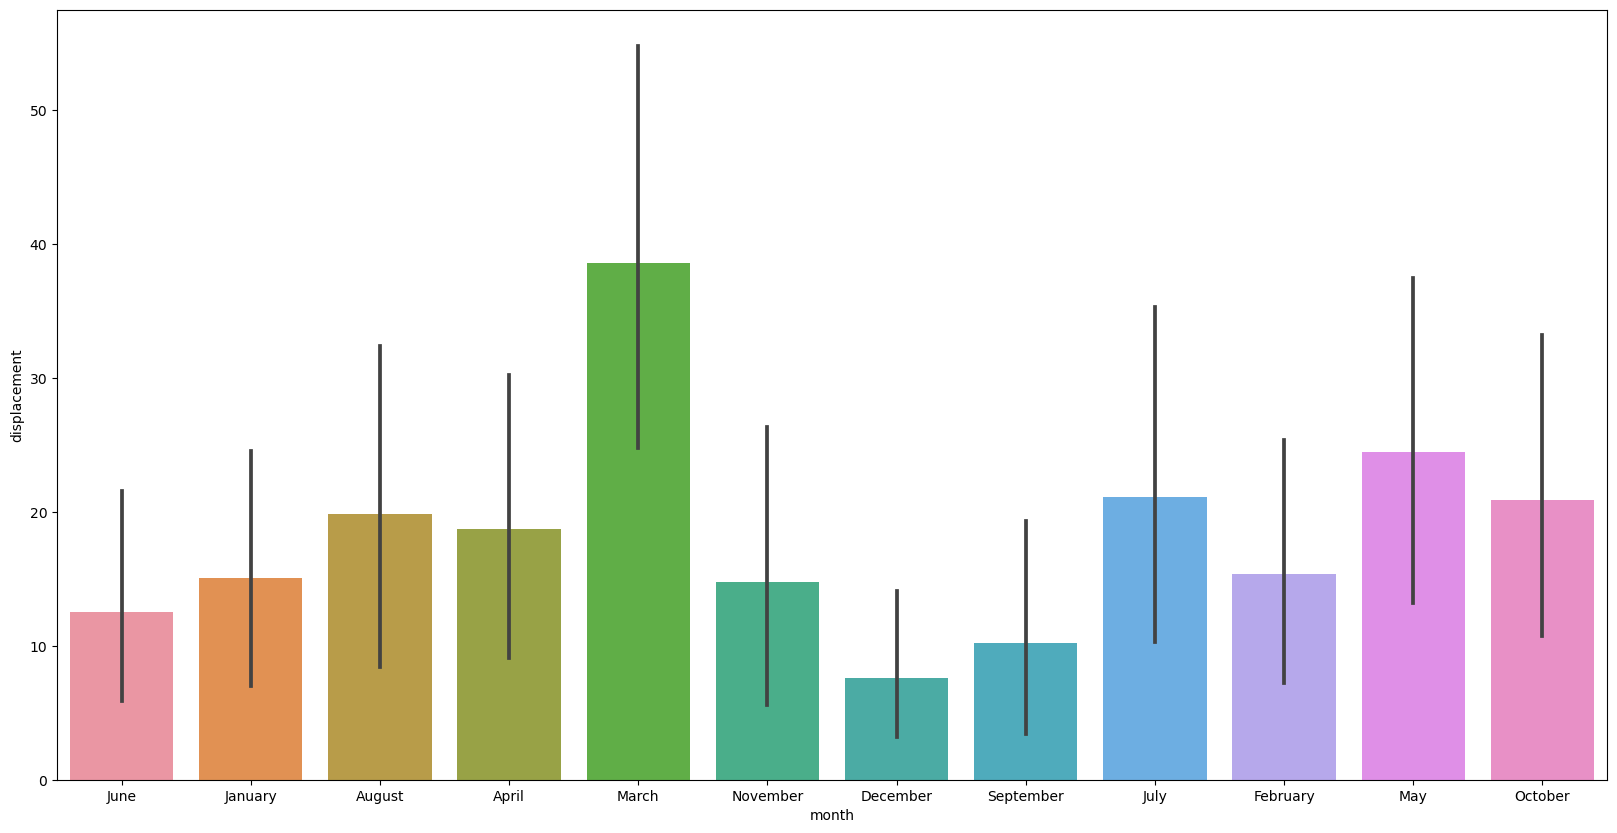

In [19]:
ax,fig=plt.subplots(figsize=(20,10))
sns.barplot(x=df.month,y=df.displacement)
plt
plt.show()

ax,fig=plt.subplots(1,2)
sns.distplot(df.amount,ax=axes[0])
sns.distplot(df.displacement,ax=axes[0])

plt.show()

In [21]:
df.amount.value_counts()

 6.50      2468
 4.50      2104
 8.50      1929
 6.10      1441
 5.30      1440
 5.70      1426
 4.90      1397
 6.90      1311
 10.50     1225
 7.30      1172
 7.70      1114
 5.50      1075
 4.10      1069
 8.10      1057
 7.00      1045
 6.00      1022
 7.50      1009
 8.00       975
 5.00       913
 8.90       868
 9.00       849
 12.50      827
 9.30       798
 9.50       795
 9.70       720
 3.70       711
 10.00      699
 10.10      652
 11.00      640
 11.50      572
 10.90      554
 14.50      553
 12.00      517
 11.30      490
 11.70      475
 4.00       446
 12.10      436
 13.00      432
 16.50      413
 13.50      412
 3.30       382
 12.90      378
 13.30      331
 14.00      322
 15.50      289
 15.00      285
 14.10      274
 18.50      273
 16.00      260
 13.70      258
 3.50       239
 14.90      234
 17.00      225
 57.33      222
 2.50       203
 15.30      197
 16.10      194
 17.50      191
 20.50      190
 19.00      182
 18.00      181
 15.70      176
 16.90  

<Axes: xlabel='displacement', ylabel='amount'>

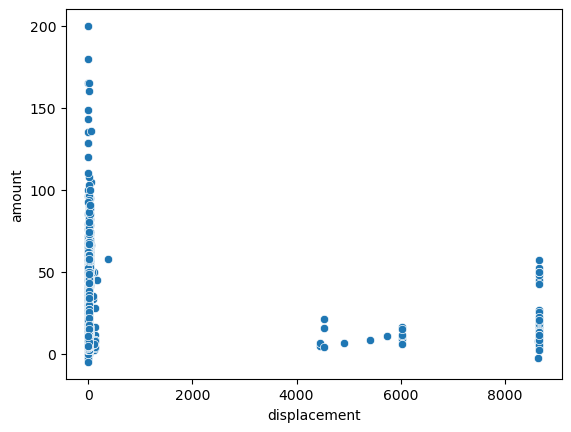

In [22]:
sns.scatterplot(y=df.amount,x=df.displacement)

In [23]:
df=df.drop(df[(df.amount==0) & (df.displacement==0)].index)
df=df.drop(df[df.amount<=1].index)
df=df.drop(df[df.no_of_passenger==0].index)


In [24]:
df.shape

(49825, 12)

In [25]:
df[['amount','displacement']]

amount  displacement
0        4.50      1.030764
1       16.90      8.450134
2        5.70      1.389525
3        7.70      2.799270
4        5.30      1.999157
5       12.10      3.787239
6        7.50      1.555807
7       16.50      4.155444
8        9.00      1.253232
9        8.90      2.849627
10       5.30      1.374577
11       5.50      0.000000
12       4.10      0.717767
13       7.00      2.019384
14       7.70      1.671445
15       5.00      0.000000
16      12.50      2.609774
17       5.30      1.511904
18       5.30      0.921952
19       4.00      0.399179
20      10.50      1.686861
21      11.50      2.292470
22       4.50      0.924296
23       4.90      1.403958
24       6.10      1.017773
25       7.30      2.531947
26       6.50      0.000000
27       4.50      0.328771
28       9.30      4.073463
29       4.50      0.808153
30       5.50      0.871913
31      22.54      6.703552
32      31.90      9.403296
33       5.70      1.381589
34      18.10      7.150503
35      58.00     12.782056
36       4.50      0.806699
37       5.30      0.951801
38       9.00      2.343802
39       9.80      3.585991
40       8.10      1.643568
41      10.90      5.013936
42      17.50      5.748259
43      12.10      5.456870
44       5.30      0.947036
45       6.90      2.548615
46       4.50      0.992738
47       3.30      0.461853
48       3.30      0.550327
49       9.00      1.647883
50       9.70      2.499316
51       5.50      1.013712
52       8.00      2.285085
53       7.50      0.207068
54      25.50     11.603774
55      15.30      5.044023
56      34.67      9.634354
57       9.70      1.690864
58      13.70      6.348901
59       6.50      1.270585
60       5.00      0.430871
61       4.50      1.231914
62       4.90      0.975062
63       7.00      1.447958
64       7.30      2.191292
65       7.50      1.620092
66       8.50      1.113419
67      16.50      3.733208
68      11.50      3.374713
69       5.00      0.834807
70       6.90      0.922055
71       3.70      0.843170
72       6.90      1.055050
73      10.10      1.199580
74      16.50      5.403873
75      15.07      3.421352
76       7.70      1.491669
77      24.90     12.503174
78       7.00      2.347840
79       8.50      1.933806
80       5.70      1.573833
81       5.00      0.833555
82       8.50      1.487035
83      17.00      5.898880
84       8.00      2.532783
85      12.00      1.652961
86      12.50      5.124095
87       7.50      2.519320
88       6.90      1.752773
89       5.00      0.589893
90      10.50      3.997868
91       7.70      2.217033
92      11.00      1.985644
93       5.70      1.296668
94       9.00      2.233332
95      13.50      3.209962
96       7.50      1.423870
97       9.00      1.493011
98      14.00      3.501525
99       5.70      1.308646
100     10.00      2.442168
101      5.70      1.179121
102      9.70      4.214837
103     14.10      6.143575
104      7.70      0.753778
105     52.00      0.000000
106     11.30      4.072166
107      8.50      3.308090
108     12.90      2.929832
109      9.50      0.565206
110      9.00      2.041429
111     10.00      2.005504
112     35.00      7.598811
113      9.00      1.491063
114     17.00      2.957085
115      6.10      1.107104
116     14.50      4.618332
117      3.70      0.481238
118     32.50      8.300768
119      5.30      1.523076
120     11.50      3.255186
121      4.00      0.939858
122     10.50      2.652653
123     17.70      9.717643
124      8.00      0.000000
125      5.00      1.680117
126     19.00      5.866831
127      8.00      2.328713
128      7.30      1.872513
129      6.50      1.800019
130      8.00      1.382405
131     16.50      5.468283
132     49.57     19.853699
133     10.50      3.672010
134     22.50     13.333605
135     11.50      3.139654
136     12.50      1.265218
137      5.50      0.714401
138      6.50      1.786755
139     16.50      6.366370
140      9.00      2.903932
141      8.90      2.078054
142

In [26]:
df.no_of_passenger.value_counts()

1    34799
2     7386
5     3453
3     2183
4     1015
6      989
Name: no_of_passenger, dtype: int64

In [27]:
df.amount.min()

2.5

In [28]:
b=pd.get_dummies(b,columns=['weekday','month','no_of_passenger'],drop_first=True)
b.sample(10)


amount  displacement  year  day      time  weekday_Monday  \
42661     9.0      2.353206  2015   20  12:25:11               0   
41150    12.5      3.614716  2014    6  08:33:34               0   
41390    10.1      2.945085  2009    1  18:20:26               0   
30956    20.1      9.084492  2011    8  02:31:10               0   
19684    28.0      9.394633  2013   16  08:00:00               0   
9193     13.5      1.887788  2014   14  18:32:00               0   
30192     6.0      0.967311  2015    9  17:30:21               1   
38042    11.3      4.109745  2010   20  21:23:49               1   
15657    10.1      3.098596  2009   16  18:54:00               1   
38776     8.5      2.590337  2013   19  13:50:00               0   

       weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
42661                 0               0                 0                1   
41150                 0               0                 1                0   
41390                 0               0                 0                1   
30956                 1               0                 0                0   
19684                 0               0                 0                1   
9193                  0               1                 0                0   
30192                 0               0                 0                0   
38042                 0               0                 0                0   
15657                 0               0                 0                0   
38776                 0               0                 0                0   

       weekday_Wednesday  month_August  month_December  month_February  \
42661                  0             0               0               0   
41150                  0             0               0               0   
41390                  0             0               0               0   
30956                  0             0               0               0   
19684                  0             0               0               0   
9193                   0             0               0               0   
30192                  0             0               0               1   
38042                  0             0               1               0   
15657                  0             0               0               1   
38776                  0             0               0               0   

       month_January  month_July  month_June  month_March  month_May  \
42661              1           0           0            0          0   
41150              0           0           0            1          0   
41390              0           0           0            0          0   
30956              1           0           0            0          0   
19684              0           0           0            0          0   
9193               0           0           0            0          0   
30192              0           0           0            0          0   
38042              0           0           0            0          0   
15657              0           0           0            0          0   
38776              0           1           0            0          0   

       month_November  month_October  month_September  no_of_passenger_1  \
42661               0              0                0                  0   
41150               0              0                0                  0   
41390               0              0                1                  1   
30956               0              0                0                  1   
19684               0              0                0                  0   
9193                0              0                1                  1   
30192               0              0                0                  1   
38042               0              0                0                  1   
15657               0              0                0                  0   
38776               0          

In [29]:
x=b.drop(['amount','day','time'],axis=1)
y=b.amount

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [31]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [32]:
model.score(x_train,y_train)

0.018511022997373394

In [33]:
model.score(x_test,y_test)

0.018536903597913268

In [ ]:
model1=RandomForestRegressor(n_estimators=210,criterion='friedman_mse', max_depth= 5)
model1.fit(x_train,y_train)

In [ ]:
model1.score(x_train,y_train)

In [ ]:
model1.score(x_test,y_test)

In [ ]:
model2=BaggingRegressor(n_estimators=20,n_jobs=2,warm_start=True)
model2.fit(x_train,y_train)

In [ ]:
model2.score(x_train,y_train)

In [ ]:
model2.score(x_test,y_test)